In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [3]:
sd=pd.read_csv("../Datasets/Salary_Data.csv")
sd.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
sd.shape

(30, 2)

In [11]:
X=sd.iloc[:,:1].values
y=sd.iloc[:,1].values

In [12]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [13]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

<AxesSubplot:>

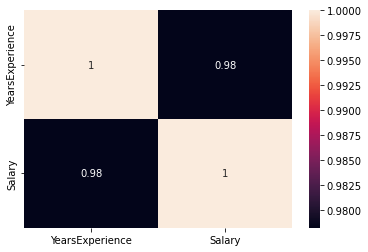

In [15]:
sns.heatmap(sd.corr(),annot=True)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
X_train

array([[ 6.8],
       [ 2.9],
       [ 9.6],
       [ 4. ],
       [ 2.2],
       [ 3.9],
       [ 5.1],
       [10.3],
       [ 9. ],
       [ 5.3],
       [ 1.5],
       [ 3.2],
       [ 9.5],
       [ 8.7],
       [ 5.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 4.1],
       [ 4.9],
       [ 3.2]])

In [21]:
len(X_train)

21

In [22]:
len(X_test)

9

In [29]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=2,random_state=1)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)

In [30]:
pred

array([ 54022.66666667,  54022.66666667,  54022.66666667,  54022.66666667,
       102013.25      ,  74604.5       , 102013.25      ,  54022.66666667,
        54022.66666667])

In [31]:
y_test

array([ 46205.,  39343.,  61111.,  57189.,  98273.,  93940., 113812.,
        60150.,  43525.])

In [50]:
X_val = np.arange(min(X_train),max(X_train),0.1)
X_val=X_val.reshape((len(X_val),1))

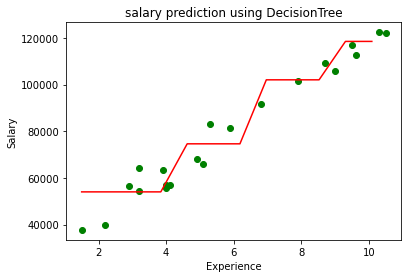

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_val,reg.predict(X_val),color='red')
plt.title('salary prediction using DecisionTree')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.figure()
plt.show()

In [56]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("MSE",metrics.mean_squared_error(y_test,pred))
print("MAE",np.sqrt(metrics.mean_absolute_error(y_test,pred)))
print("R-Squared",metrics.r2_score(y_test,pred)*100)

MAE 9361.277777777777
MSE 112409490.31944445
MAE 96.75369645536948
R-Squared 82.58429570777876


In [57]:
reg.score(X_test,y_test)

0.8258429570777877

In [59]:
reg.score(X_train,y_train)

0.9237265310163405

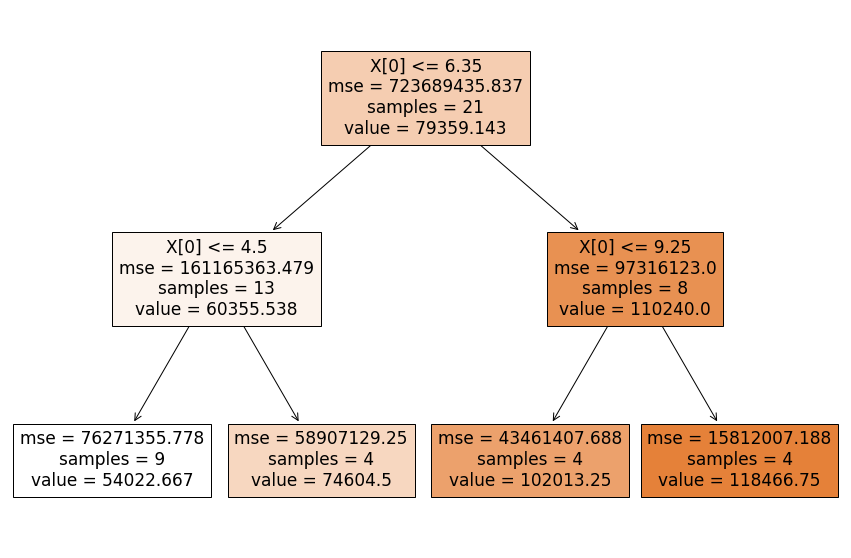

In [60]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg,filled=True)
plt.show()

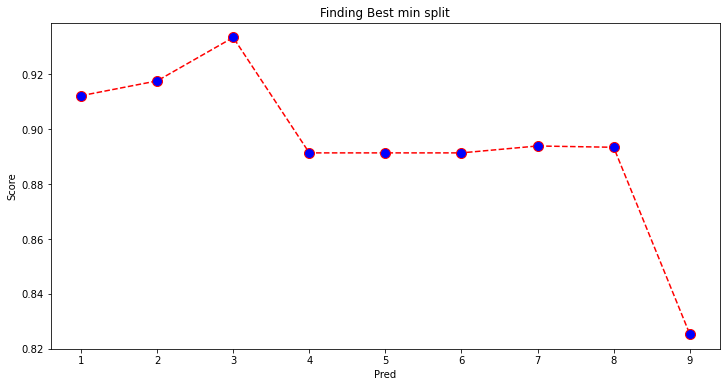

In [64]:
score=[]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
for i in range(2,11):
    model=DecisionTreeRegressor(min_samples_split=i,random_state=0)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score1=r2_score(y_test,y_pred)
    score.append(score1)
plt.figure(figsize=(12,6))
plt.plot(range(1,10),score,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Finding Best min split")
plt.xlabel("Pred")
plt.ylabel('Score')
plt.show()

In [65]:
from sklearn.tree import DecisionTreeRegressor
reg1=DecisionTreeRegressor(min_samples_split=2,criterion='mae',random_state=1)
reg1.fit(X_train,y_train)
pred=reg1.predict(X_test)
reg1.score(X_test,y_test)

0.9122236820313415